# Obesity risk factors classification

In [2]:
# import the nescessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn import svm
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
#importing the dataset
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#checking for the data size and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
BMI=data['Weight'].values/((data['Height'].values)**2)
data['BMI']=BMI
datax= data.drop(labels=['Height','Weight','family_history_with_overweight','FAVC'],axis=1)
datax[508:515]

,Gender,Age,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
508,Male,17.188754,2.000000,4.000000,Sometimes,no,2.884033,no,2.000000,1.340107,Sometimes,Public_Transportation,Insufficient_Weight,17.739065
509,Male,22.285024,2.450218,3.995147,Sometimes,no,2.147746,no,2.000000,0.589980,Sometimes,Public_Transportation,Insufficient_Weight,18.168135
510,Female,22.000000,3.000000,3.000000,Frequently,no,2.815293,no,1.978631,1.000000,no,Public_Transportation,Insufficient_Weight,18.223024
511,Female,21.024970,3.000000,3.000000,Frequently,no,2.593459,no,2.000000,1.000000,no,Public_Transportation,Insufficient_Weight,17.963118
512,Female,22.038327,2.880161,3.000000,Frequently,no,1.031354,no,2.206738,1.374650,no,Public_Transportation,Insufficient_Weight,17.741005
513,Female,21.243142,3.000000,1.726260,Frequently,no,2.444125,no,1.318170,0.000000,no,Public_Transportation,Insufficient_Weight,17.561293
514,Female,22.142432,3.000000,2.581015,Frequently,no,2.654702,no,0.902095,0.000000,no,Public_Transportation,Insufficient_Weight,16.819197


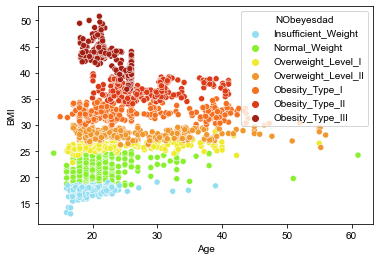

In [6]:
sns.scatterplot(data=data,x='Age',y='BMI',hue='NObeyesdad', 
                hue_order=('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                     'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'),
                palette=['#93dff1','#88f02d','#f0ea2d','#f0972d','#f46f1f','#dc3b18','#a41f13'])
sns.set(rc={'figure.figsize':(8,5)})

var_encoding = {'Gender':                     {0: 'Male', 1: 'Female'},
            'family_history_with_overweight': {1: 'yes', 0: 'no'},
            'FAVC':                           {1: 'yes', 0: 'no'},
            'FCVC':                           {0:'no', 1: 'Sometimes', 2:'Frequently',3:'Always'},    
            'CAEC':                           {0:'no', 1: 'Sometimes', 2:'Frequently',3:'Always'},
            'SMOKE':                          {1: 'yes', 0: 'no'},
            'SCC':                            {1: 'yes', 0: 'no'},
            'CALC':                           {0:'no', 1: 'Sometimes', 2:'Frequently',3:'Always'}}
                                               
datas = data.replace(var_encoding)
datas.head()

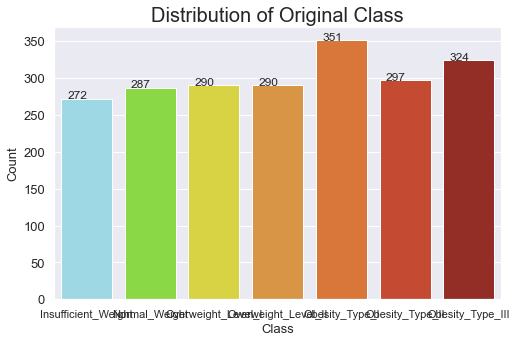

In [7]:
import seaborn as sns
pic = sns.countplot(x="NObeyesdad",
              order=('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                     'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'), 
              data=data,
              palette=['#93dff1','#88f02d','#f0ea2d','#f0972d','#f46f1f','#dc3b18','#a41f13'])
#palette=['#93dff1','#93f1cf','#fff670','#ffcd70','#ffa170','#f8a696','#f97c77']

sns.set(rc={'figure.figsize':(13,5)})
plt.title('Distribution of Original Class',size=20)
plt.ylabel('Count',size=13)
plt.xlabel('Class',size=13)
plt.yticks(size=13)
plt.xticks(size=11)

for p in pic.patches:
        pic.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

In [8]:
#colors:https://stackoverflow.com/questions/57417970/how-to-set-custom-colors-on-a-count-plot-in-seaborn
#frontsize: https://stackoverflow.com/questions/63255628/how-to-increase-the-font-size-on-the-countplot-in-python-pandas

In [9]:
# encoding variable into binomial and numerical value
data_encoding = {'Gender':                         {'Male': 0, 'Female': 1},
                'family_history_with_overweight': {'yes': 1, 'no': 0},
                'FAVC':                           {'yes': 1, 'no': 0},
                'CAEC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'SMOKE':                          {'yes': 1, 'no': 0},
                'SCC':                            {'yes': 1, 'no': 0},
                'CALC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'NObeyesdad':                     {'Insufficient_Weight':0, 
                                                   'Normal_Weight':1, 
                                                   'Overweight_Level_I':2,
                                                   'Overweight_Level_II':3,
                                                   'Obesity_Type_I':4, 
                                                   'Obesity_Type_II':5, 
                                                   'Obesity_Type_III':6}}
datas = data.replace(data_encoding)
datas.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,1,24.386526
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,1,24.238227
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,1,23.765432
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,2,26.851852
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,3,28.342381


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['NObeyesdad'])
data['classenc'] = le.transform(data['NObeyesdad'])
data['classenc'].hist()

<AxesSubplot:>

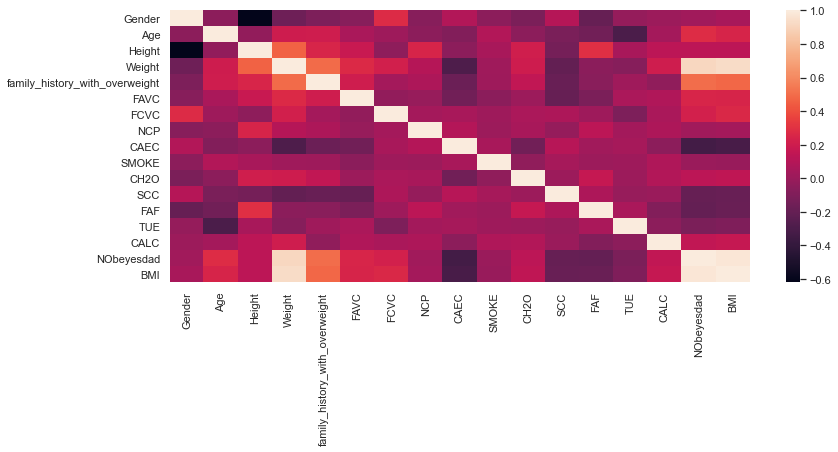

In [10]:
datas_corr = datas.corr()
sns.heatmap(datas_corr, xticklabels=datas_corr.columns, yticklabels=datas_corr.columns)

### family_history_with_overweight

We cannot use class which is categorical data in x of displot so that's why I changed it to BMI.

Text(0.5, 1.0, 'Family History with Overweight')

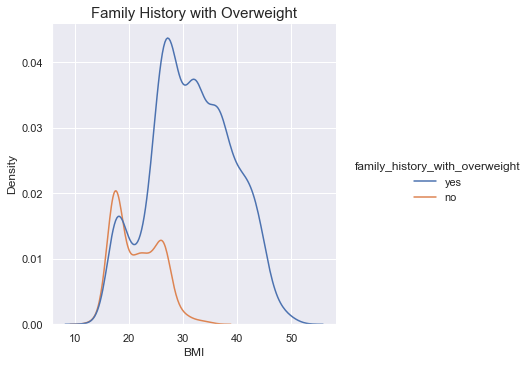

In [51]:
sns.displot(x='BMI', data=data, kind='kde', hue='family_history_with_overweight')
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Family History with Overweight',size=15)

Thus, in this case, I used histplot to indicate the density and frequency in different grounps.

Text(0.5, 1.0, 'Family History with Overweight')

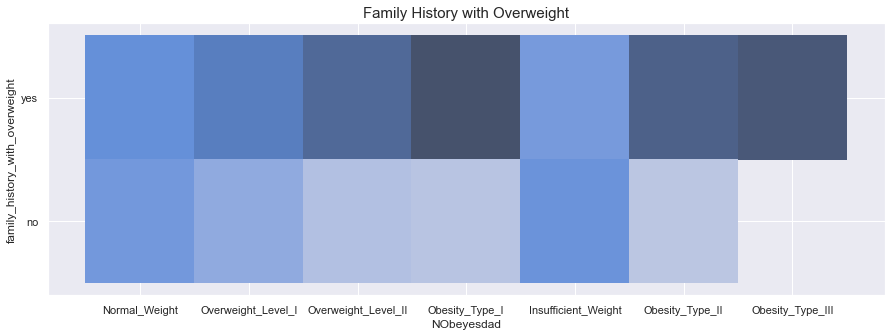

In [54]:
sns.histplot(data=data,x='NObeyesdad',y='family_history_with_overweight')
plt.title('Family History with Overweight',size=15)

We cannot use the scatter plot to indicate the density for catergorical data as the pic shows below.

Text(0.5, 1.0, 'Family History with Overweight')

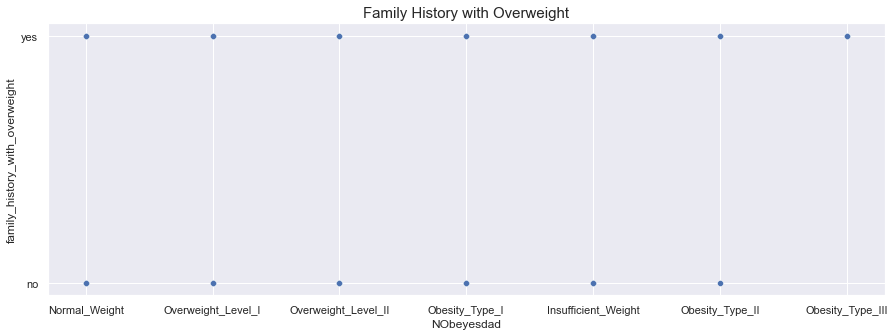

In [55]:
sns.scatterplot(x='NObeyesdad',y='family_history_with_overweight', data=data)
plt.title('Family History with Overweight',size=15)

We cannot use the stripplot as it won't show the density here

Text(0.5, 1.0, 'Family History with Overweight')

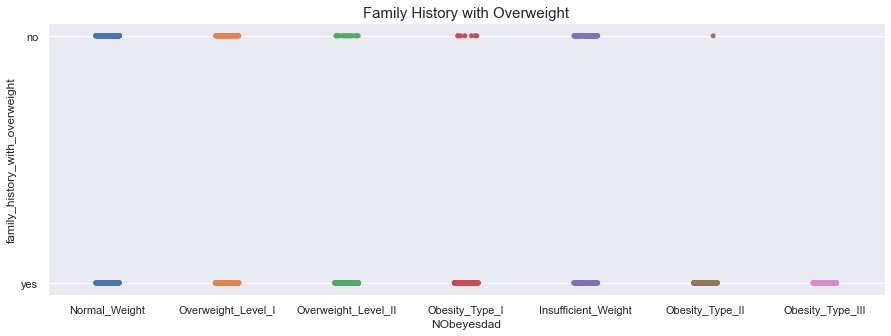

In [66]:
sns.stripplot(x=data['NObeyesdad'], y=data['family_history_with_overweight'])
plt.title('Family History with Overweight',size=15)

### FAVC

Text(0.5, 1.0, 'Do you eat high caloric food frequently?')

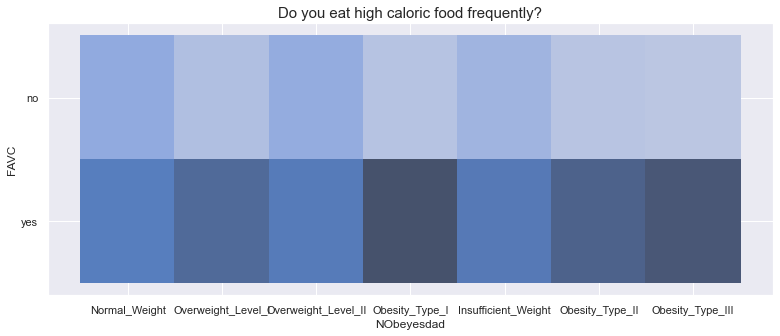

In [14]:
sns.histplot(x='NObeyesdad',y='FAVC', data=data)
plt.title('Do you eat high caloric food frequently?',size=15)

### FCVC

The scatter plot can be used in numerical data but i don't feel the density is clear enough.

Text(0.5, 1.0, 'Do you usually eat vegetables in your meals?')

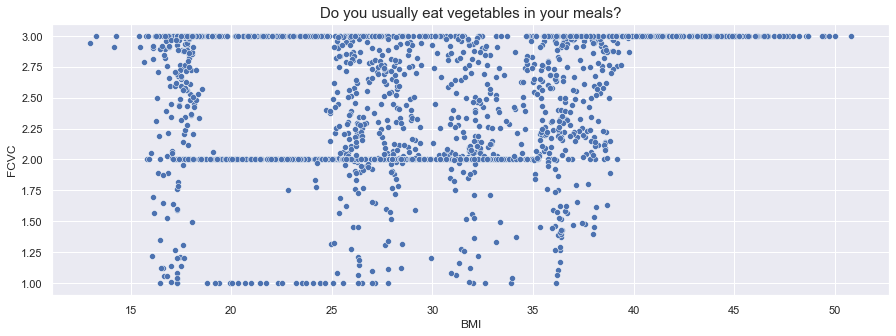

In [56]:
sns.scatterplot(x='BMI',y='FCVC', data=data)
plt.title('Do you usually eat vegetables in your meals?',size=15)

Thus, I change it to histplot. However, the possible values should be 1, 2, 3 and due to the 
problem of synthetical data we got some values fell within 1 to 3.

Text(0.5, 1.0, 'Do you usually eat vegetables in your meals?')

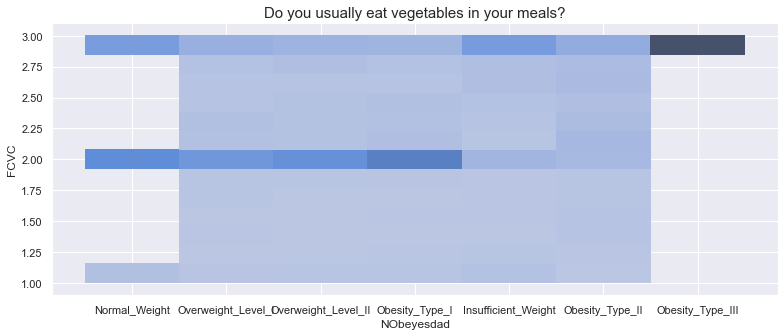

In [35]:
sns.histplot(x='NObeyesdad',y='FCVC', data=data)
plt.title('Do you usually eat vegetables in your meals?',size=15)

The below pic is the expected pic.

Text(0.5, 1.0, 'Do you usually eat vegetables in your meals')

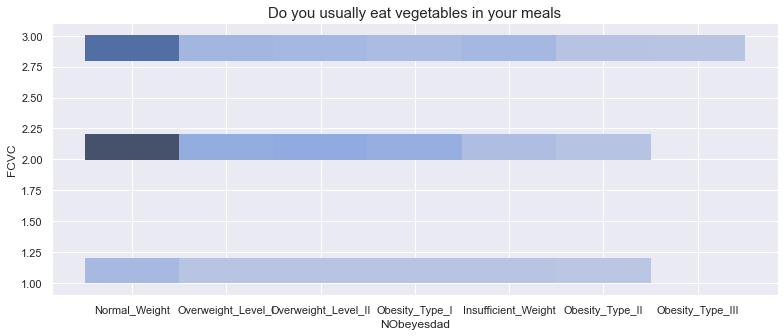

In [15]:
sns.histplot(x='NObeyesdad',y='FCVC', data=data[:499])
plt.title('Do you usually eat vegetables in your meals',size=15)

# NCP

Text(0.5, 1.0, 'How many main meals do you have daily?')

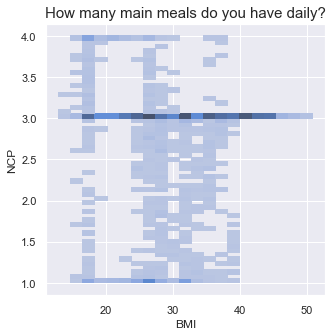

In [55]:
sns.histplot(x='BMI',y='NCP', data=data)
plt.title('How many main meals do you have daily?',size=15)

Text(0.5, 1.0, 'How many main meals do you have daily?')

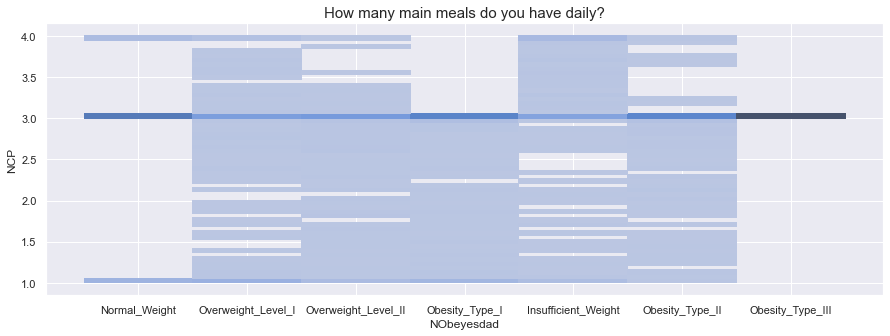

In [61]:
sns.histplot(x='NObeyesdad',y='NCP', data=data,)
plt.title('How many main meals do you have daily?',size=15)

# CAEC

Text(0.5, 1.0, 'Do you eat any food between meals?')

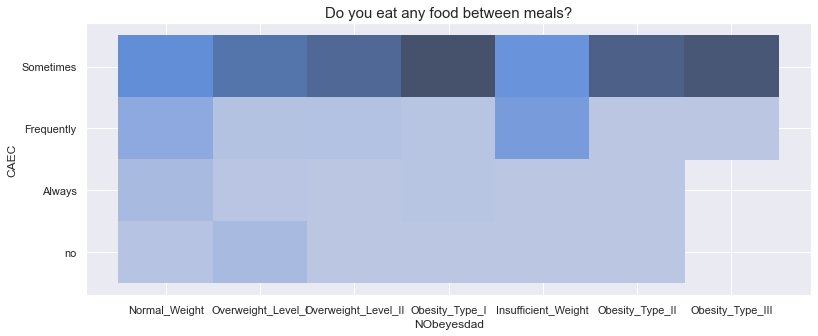

In [37]:
sns.histplot(x='NObeyesdad',y='CAEC', data=data)
plt.title('Do you eat any food between meals?',size=15)

# CH2O

Text(0.5, 1.0, 'How much water do you drink daily?')

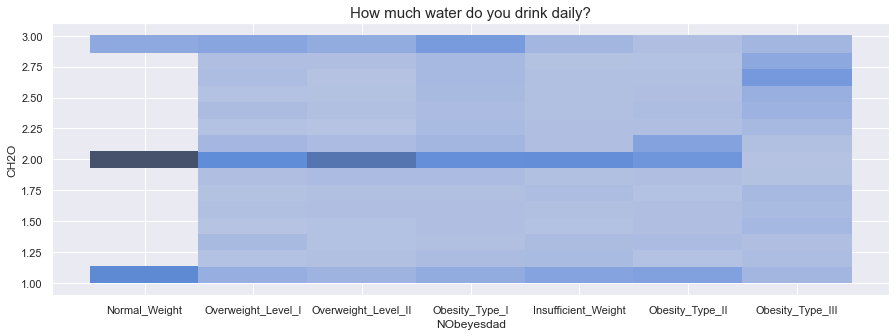

In [64]:
sns.histplot(x='NObeyesdad',y='CH2O', data=data,)
plt.title('How much water do you drink daily?',size=15)

# CALC

Text(0.5, 1.0, 'How often do you drink alcohol?')

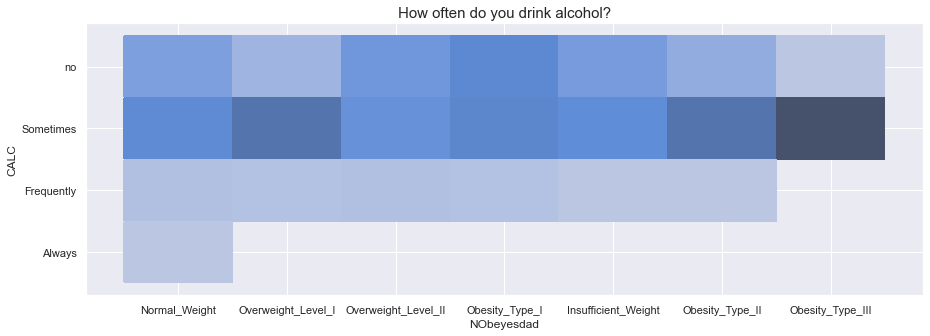

In [68]:
sns.histplot(x='NObeyesdad',y='CALC', data=data,)
plt.title('How often do you drink alcohol?',size=15)

# SMOKE

Text(0.5, 1.0, 'Do you smoke?')

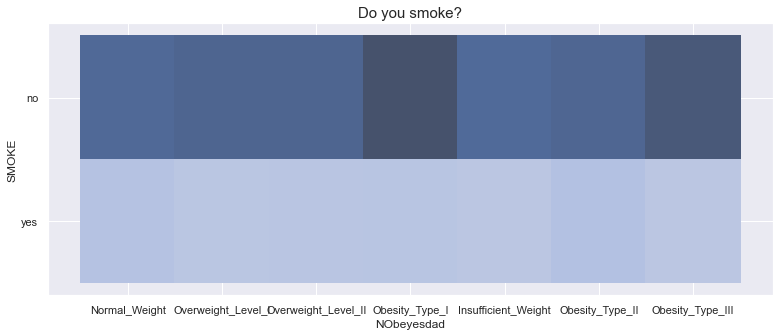

In [17]:
sns.histplot(x='NObeyesdad',y='SMOKE', data=data)
plt.title('Do you smoke?',size=15)

# SCC

Text(0.5, 1.0, 'Do you monitor the calories you eat daily?')

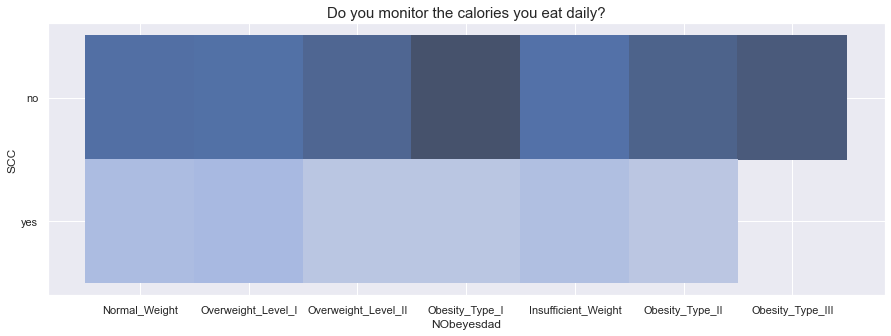

In [70]:
sns.histplot(x='NObeyesdad',y='SCC', data=data)
plt.title('Do you monitor the calories you eat daily?',size=15)

# FAF

Text(0.5, 1.0, 'How often do you have physical activity?')

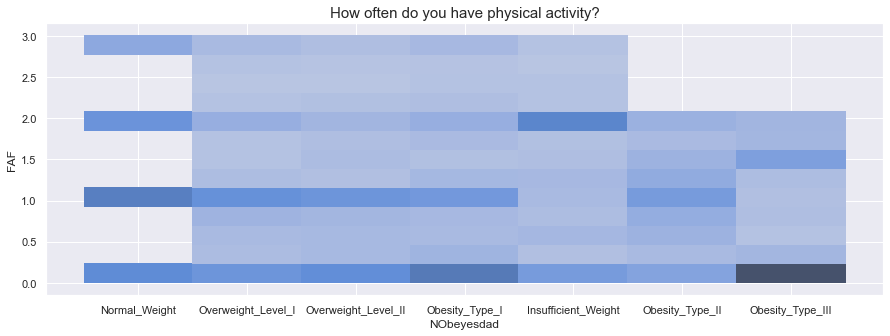

In [72]:
sns.histplot(x='NObeyesdad',y='FAF', data=data)
plt.title('How often do you have physical activity?',size=15)

# TUE

Text(0.5, 1.0, 'How much time do you use technological devices?')

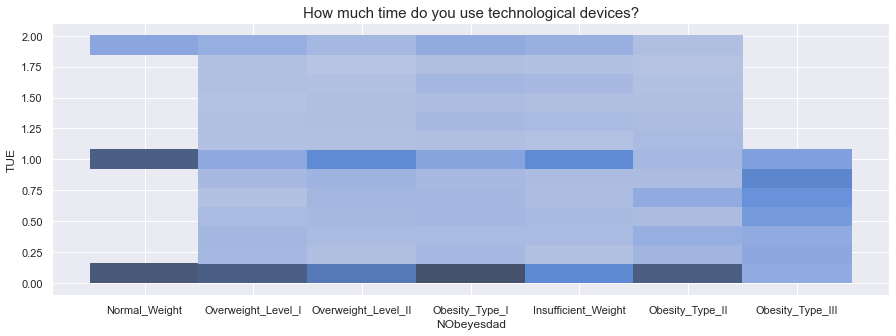

In [73]:
sns.histplot(x='NObeyesdad',y='TUE', data=data)
plt.title('How much time do you use technological devices?',size=15)

Text(0.5, 1.0, 'Which transportation do you usually use?')

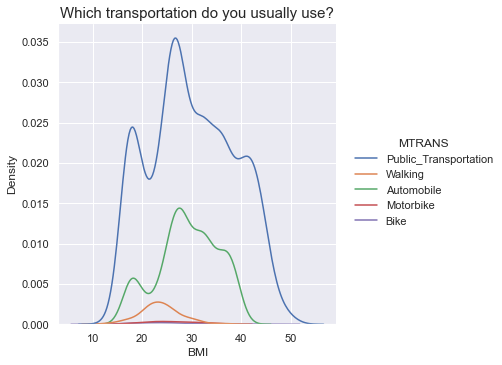

In [66]:
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(x='BMI', data=data, kind='kde', hue='MTRANS')
plt.title('Which transportation do you usually use?',size=15)

encoding = {'Gender':                         {'Male': 0, 'Female': 1},
            'family_history_with_overweight': {'yes': 1, 'no': 0},
            'FAVC':                           {'yes': 1, 'no': 0},
            'CAEC':                           {'no': 0, 'Sometimes': 1,'Frequently': 2, 'Always': 3},
            'SMOKE':                          {'yes': 1, 'no': 0},
            'SCC':                            {'yes': 1, 'no': 0},
            'CALC':                           {'no': 0, 'Sometimes': 1,'Frequently': 2, 'Always': 3}}
                                               
datas = data.replace(var_encoding)
datas.head()